In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# MultiBox IOU Implementation

In [29]:
def calcIOU(ground_boxes,pred_boxes):
  img1 = np.zeros((240,320,3), dtype = np.uint8)
  img2 = np.zeros((240,320,3), dtype = np.uint8)

  for x1,y1,x2,y2 in ground_boxes:
    ground = cv2.rectangle(img1, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), -1)

  for x1,y1,x2,y2 in pred_boxes:
    pred = cv2.rectangle(img2, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), -1)

  print('\n~~~~~~~~~~~~~~~~  GROUND  ~~~~~~~~~~~~~~~~\n')
  cv2_imshow(ground)
  print('\n~~~~~~~~~~~~~~  PREDICTED  ~~~~~~~~~~~~~~~\n')
  cv2_imshow(pred)
  union = cv2.bitwise_or(ground,pred)
  intersection = cv2.bitwise_and(ground,pred)

  img_gray = cv2.cvtColor(union, cv2.COLOR_BGR2GRAY)
  contours, hierarchy = cv2.findContours(image=img_gray, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
  union_copy = union.copy()
  cv2.drawContours(image=union_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)  
  union_area = sum([cv2.contourArea(contour) for contour in contours]) 
  print('\n~~~~~~~~~~~~~~~~  UNION  ~~~~~~~~~~~~~~~~\n')                     
  cv2_imshow(union_copy)

  img_gray = cv2.cvtColor(intersection, cv2.COLOR_BGR2GRAY)
  contours, hierarchy = cv2.findContours(image=img_gray, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
  intersection_copy = intersection.copy()
  cv2.drawContours(image=intersection_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)  
  intersection_area = sum([cv2.contourArea(contour) for contour in contours]) 
  print('\n~~~~~~~~~~~~~  INTERSECTION  ~~~~~~~~~~~~~\n')                      
  cv2_imshow(intersection_copy)

  print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')
  print('Intersection Area:',intersection_area)
  print('Union Area:',union_area)
  IOU = round(intersection_area/union_area,5)
  print('IOU Score: ',IOU)


~~~~~~~~~~~~~~~~  GROUND  ~~~~~~~~~~~~~~~~



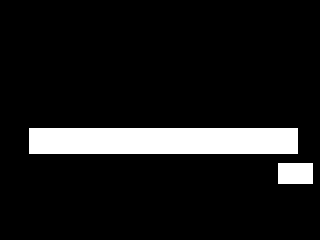


~~~~~~~~~~~~~~  PREDICTED  ~~~~~~~~~~~~~~~



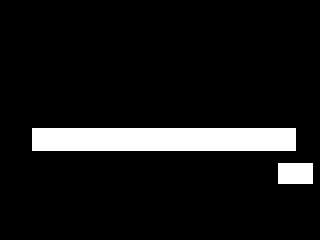


~~~~~~~~~~~~~~~~  UNION  ~~~~~~~~~~~~~~~~



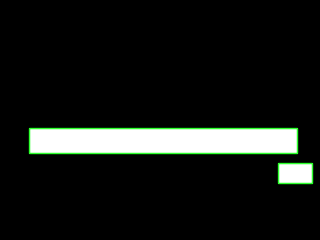


~~~~~~~~~~~~~  INTERSECTION  ~~~~~~~~~~~~~



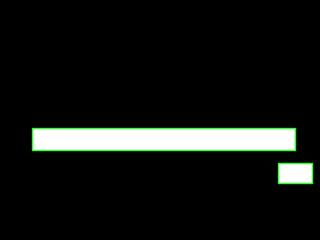


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Intersection Area: 6466.0
Union Area: 7380.0
IOU Score:  0.87615


In [36]:
ground_boxes = [[29.01960784, 128.2352941, 297.254902, 153.3333333],[278.0392157, 163.1372549, 312.5490196, 183.5294118]]
pred_boxes = [[32.01960784, 128.2352941, 295.254902, 150.3333333],[278.0392157, 163.1372549, 312.5490196, 183.5294118]]
calcIOU(ground_boxes,pred_boxes)

# SINGLE BOX IOU

In [25]:
box1 = 270.0392157,140.8235294,305.4509804,163.6078431
box2 = 272.0392157,145.8235294,305.4509804,163.6078431

In [24]:
x1, y1, x2, y2 = box1 
x3, y3, x4, y4 = box2
x_inter1 = int(max(x1, x3))
y_inter1 = int(max(y1, y3))
x_inter2 = int(min(x2, x4))
y_inter2 = int(min(y2, y4))
width_inter = abs(x_inter2 - x_inter1) 
height_inter = abs(y_inter2 - y_inter1)
area_inter = width_inter*height_inter
width_box1 = abs(x2-x1)
height_box1 = abs(y2 - y1)
width_box2 = abs(x4 - x3)
height_box2 = abs(y4 - y3)
area_box1 = width_box1*height_box1
area_box2 = width_box2*height_box2
area_union = area_box1 + area_box2 - area_inter
iou = area_inter / area_union
print(round(iou,5))

0.73602


In [26]:
print(area_inter)

594


In [27]:
print(area_union)

807.0380602907712
